In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder

In [3]:
file_path = '/content/demographics_large.csv'
main_data = pd.read_csv(file_path)
print(main_data.head())

  first_name last_name blood_type marriage_status  income     device
0      Emily     Green         O-         MARRIED   94794  AndroidOS
1   Scarlett     Allen        AB-         MARRIED   68124      MacOS
2    Michael     Lewis         B+         married  196745        iOS
3      Mason     Young         O-       unmarried  145707        iOS
4    Michael     Young        AB+         married  198677      MacOS


In [4]:
valid_blood_type_list = ['A+', 'A-', 'B+', 'B-', 'AB+', 'AB-', 'O+', 'O-']
blood_type_categories = pd.DataFrame({'blood_type': valid_blood_type_list})
print(blood_type_categories)

  blood_type
0         A+
1         A-
2         B+
3         B-
4        AB+
5        AB-
6         O+
7         O-


In [5]:
unique_blood_types_main = set(main_data['blood_type'])
valid_blood_types_set = set(blood_type_categories['blood_type'])
bogus_blood_types = unique_blood_types_main.difference(valid_blood_types_set)
bogus_blood_types

set()

In [6]:
bogus_records_index = main_data['blood_type'].isin(bogus_blood_types)

without_bogus_records = main_data[~bogus_records_index].copy()
without_bogus_records['blood_type'].unique()

array(['O-', 'AB-', 'B+', 'AB+', 'A+', 'O+', 'B-', 'A-'], dtype=object)

In [7]:
main_data['marriage_status'].unique()

array(['MARRIED', 'married', 'unmarried'], dtype=object)

In [8]:
#Standardizing the categories by converting all text to lowercase.
inconsistent_data = main_data.copy()
inconsistent_data['marriage_status'] = inconsistent_data['marriage_status'].str.lower()
inconsistent_data['marriage_status'].unique()

array(['married', 'unmarried'], dtype=object)

In [9]:
#Now we will standardize the categories by stripping extra spaces
inconsistent_data['marriage_status'] = inconsistent_data['marriage_status'].str.strip()

inconsistent_data['marriage_status'].unique()

array(['married', 'unmarried'], dtype=object)

In [10]:
#Step 5: Grouping Income into Meaningful Bins
print(f"Max income - {main_data['income'].max()}, Min income - {main_data['income'].min()}")

Max income - 199880, Min income - 50057


In [11]:
#Now, let us create the range and labels for the income feature. Pandas cut method is used here
income_bins = [40000, 75000, 100000, 125000, 150000, np.inf]
income_labels = ['40k-75k', '75k-100k', '100k-125k', '125k-150k', '150k+']

remapping_data = main_data.copy()
remapping_data['income_groups'] = pd.cut(
    remapping_data['income'],
    bins=income_bins,
    labels=income_labels
)

remapping_data.head()

,first_name,last_name,blood_type,marriage_status,income,device,income_groups
0,Emily,Green,O-,MARRIED,94794,AndroidOS,75k-100k
1,Scarlett,Allen,AB-,MARRIED,68124,MacOS,40k-75k
2,Michael,Lewis,B+,married,196745,iOS,150k+
3,Mason,Young,O-,unmarried,145707,iOS,125k-150k
4,Michael,Young,AB+,married,198677,MacOS,150k+


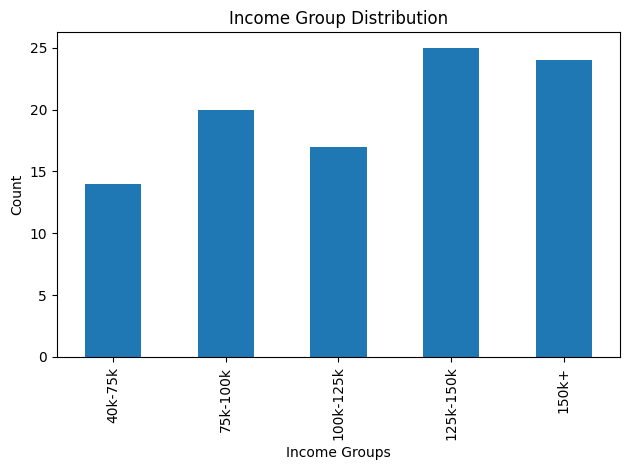

In [12]:
#Step 6: Visualizing Income Group Distribution
remapping_data['income_groups'].value_counts().sort_index().plot.bar()
plt.title('Income Group Distribution')
plt.xlabel('Income Groups')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [13]:
#cleaning phone number data
import random
phone_numbers = []

for i in range(100):
    number = random.randint(100000000, 9999999999)  # length can be 9 or 10 digits
    if i % 2 == 0:
        phone_numbers.append('+91 ' + str(number))  # add +91 prefix for some
    else:
        phone_numbers.append(str(number))

phone_numbers_data = pd.DataFrame({
    'phone_numbers': phone_numbers
})

phone_numbers_data.head()

,phone_numbers
0,+91 3944078307
1,159248882
2,+91 4109522982
3,7038128908
4,+91 5309463329


Based on the use case the country code before numbers could be dropped or added for missing ones. Similarly phone numbers with less than 10 numbers should be discarded.

In [14]:
phone_numbers_data['phone_numbers'] = phone_numbers_data['phone_numbers'].str.replace(r'\+91 ', '', regex=True)

num_digits = phone_numbers_data['phone_numbers'].str.len()

invalid_numbers_index = phone_numbers_data[num_digits < 10].index
phone_numbers_data.drop(invalid_numbers_index, inplace=True)

phone_numbers_data.dropna(inplace=True)
phone_numbers_data.reset_index(drop=True, inplace=True)

phone_numbers_data.head()

,phone_numbers
0,3944078307
1,4109522982
2,7038128908
3,5309463329
4,4217657541



Finally we can verify whether the data is clean or not.


assert not phone_numbers_data['phone_numbers']

In [15]:
assert not phone_numbers_data['phone_numbers'].str.contains(r'\+91 ').any(), "Found phone numbers with '+91 ' prefix"
assert (phone_numbers_data['phone_numbers'].str.len() == 10).all(), "Some phone numbers do not have 10 digits"

visualising categorical data

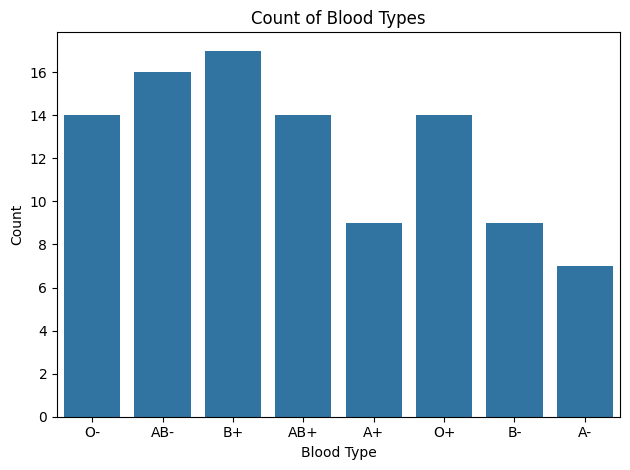

In [16]:
import seaborn as sns
sns.countplot(x='blood_type', data=without_bogus_records)
plt.title('Count of Blood Types')
plt.xlabel('Blood Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

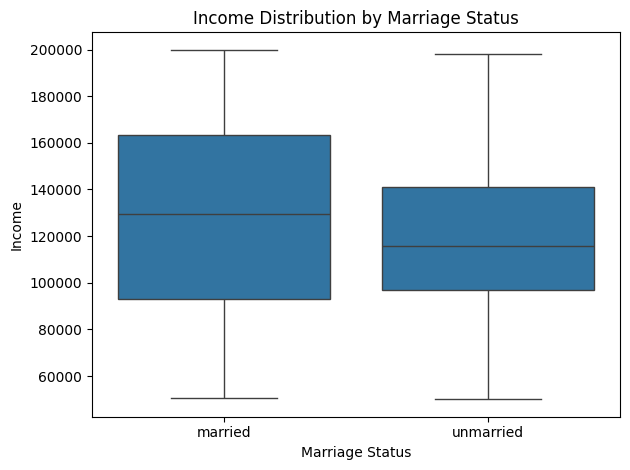

In [17]:
sns.boxplot(x='marriage_status', y='income', data=inconsistent_data)

plt.title('Income Distribution by Marriage Status')
plt.xlabel('Marriage Status')
plt.ylabel('Income')
plt.tight_layout()
plt.show()

In [18]:
#label encoding
le = LabelEncoder()
without_bogus_records['blood_type_encoded'] = le.fit_transform(without_bogus_records['blood_type'])

without_bogus_records[['blood_type', 'blood_type_encoded']].drop_duplicates()

,blood_type,blood_type_encoded
0,O-,7
1,AB-,3
2,B+,4
4,AB+,2
6,A+,0
9,O+,6
17,B-,5
24,A-,1


In [19]:
#one hot encoding
inconsistent_data = pd.get_dummies(inconsistent_data, columns=['marriage_status'])
inconsistent_data.head()

,first_name,last_name,blood_type,income,device,marriage_status_married,marriage_status_unmarried
0,Emily,Green,O-,94794,AndroidOS,True,False
1,Scarlett,Allen,AB-,68124,MacOS,True,False
2,Michael,Lewis,B+,196745,iOS,True,False
3,Mason,Young,O-,145707,iOS,False,True
4,Michael,Young,AB+,198677,MacOS,True,False


In [21]:
#ordinary encoding in python
custom_map = {
    '40k-75k': 1,
    '75k-100k': 2,
    '100k-125k': 3,
    '125k-150k': 4,
    '150k+': 5
}

remapping_data['income_groups_encoded'] = remapping_data['income_groups'].map(custom_map)

remapping_data[['income', 'income_groups', 'income_groups_encoded']].head()

,income,income_groups,income_groups_encoded
0,94794,75k-100k,2
1,68124,40k-75k,1
2,196745,150k+,5
3,145707,125k-150k,4
4,198677,150k+,5
